In [1]:
def conditionTheorem4_3(s1, g1, q1, s2, g2, q2):
    if (s1 == 2 or s2 == 2):
        return True
    elif (g1 == 1 and g2 == 1):
        return True
    elif ((g1 == 1 and q2 == 1) or (q1 == 1 and g2 == 1)):
        return True
    elif (q1 == 1 and q2 == 1):
        return True
    else:
        return False
    
def conditionTheorem4_4(s1, g1, q1, s2, g2, q2):
    if (s1 == 3 or s2 == 3):
        return True
    elif (g1 == 2 or g2 == 2):
        return True
    elif (q1 == 2 or q2 == 2):
        return True
    else:
        return False
    

def calccograph(G, root, dict):
    '''G'''
#   if root is leaf node
    if G.order() == 1:
        return (1, 1, 0, 1)
    
    list = G.neighbors(root)
    root1 = list[0]
    root2 = list[1]
    
    G.delete_vertex(root)
    komponente = G.connected_components(sort=False)
    if (G.subgraph(komponente[0]).has_vertex(root1)):
        (s1, g1, q1, n1) = calccograph(G.subgraph(komponente[0]), root1, dict)
        (s2, g2, q2, n2) = calccograph(G.subgraph(komponente[1]), root2, dict)
    else:
        (s1, g1, q1, n1) = calccograph(G.subgraph(komponente[0]), root2, dict)
        (s2, g2, q2, n2) = calccograph(G.subgraph(komponente[1]), root1, dict)
    if dict[root]:
        return (s1 + s2, g1 + g2, min(q1 + g2, q2 + g1), n1 + n2)
    else:
        # gammaS
        if (s1 == 1 and s2 == 1):
            gammaS = 1
        elif (s1 == 1 and s2 >= 2):
            if n1 == 1:
                gammaS = min(g2 + 1, s2, q2 + 1)
            else:
                gammaS = 2
        elif (s2 == 1 and s1 >= 2):
            if n1 == 1:
                gammaS = min(g1 + 1, s1, q1 + 1)
            else:
                gammaS = 2
        else:
            if conditionTheorem4_3(s1, g1, q1, s2, g2, q2):
                gammaS = 2
            elif conditionTheorem4_4(s1, g1, q1, s2, g2, q2):
                gammaS = 3
            else:
                gammaS = 4
        
        # gamma
        if (g1 == 1 or g2 == 1):
            gamma = 1
        else:
            gamma = 2
        
        # q
        if (q1 == 0 or q2 == 0):
            q = max(q1, q2)
        else:
            q = min(q1, q2)
        return (gammaS, gamma, q, n1 + n2)

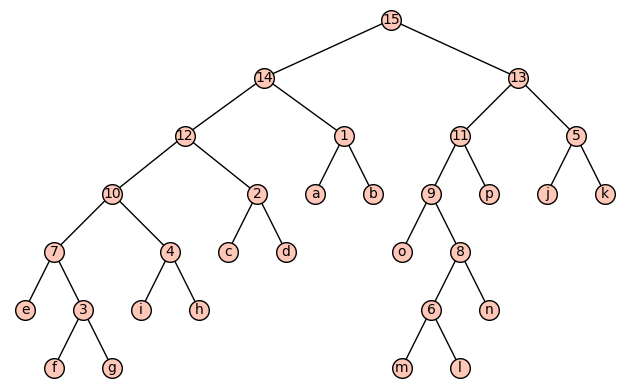

In [2]:
H = Graph({
    "a" : [1],
    "b" : [1],
    "c" : [2],
    "d" : [2],
    "e" : [7],
    "f" : [3],
    "g" : [3],
    "h" : [4],
    "i" : [4],
    "j" : [5],
    "k" : [5],
    "l" : [6],
    "m" : [6],
    "n" : [8],
    "o" : [9],
    "p" : [11],
    1: ["a", "b", 14],
    2: ["c", "d", 12],
    3: ["f", "g", 7],
    4: ["h", "i", 10],
    5: ["j", "k", 13],
    6:["l", "m", 8],
    7:["e", 3, 10],
    8: ["n", 6, 9],
    9: ["o", 8, 11],
    10: [7, 4, 12],
    11: [9, "p", 13],
    12:[2, 10, 14],
    13:[5, 11, 15],
    14:[1, 12, 15],
    15:[14, 13]
    
})

dict = {
    1: False,
    2: True,
    3: True,
    4: False,
    5: False,
    6: True,
    7: False,
    8: False,
    9: True,
    10: True,
    11: False,
    12: False,
    13: True,
    14: True,
    15: False
       }

plot(H, layout='tree', tree_root=15)

In [3]:
calccograph(H, 15, dict)

(3, 2, 1, 16)